In [1]:
#Las Siguientes lineas no requieren de ninguna modificación, 
#son las librerias necesarias para el funcionamiento de la libreta
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import matplotlib.colors as colors
colores = list(colors._colors_full_map.values())
colores[1]= '#5698C6'
colores[2]= '#FF973B'
colores[3]= '#60B760'
colores[4]= '#E05C5D'
colores[5]= '#AC72A2'
colores[6]= '#8E594E'
colores[7]= '#FD9FD4'

output_notebook()


archivo1='../Thingsboard/totales.csv'
columnas  = ['ts','T1','T2','T3','T4','T5','T6','T7']
def importa(archivo,columnas):
    
    tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=2)
    #tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=200)
    tmp=tmp.set_index('ts')
    tmp=tmp.dropna()
    return tmp


Loading BokehJS ...

In [45]:
datos=importa(archivo1,columnas)
datos.index=pd.to_datetime(datos.index,format='%d/%m/%Y  %H:%M')
datos
fecha1 = '2020-04-01 12:18:00'
fecha2 = '2020-04-12 12:18:00'
#fecha1 = '2020-04-15 00:00:00'
#fecha2 = '2020-04-16 00:18:00'

#datos=datos[fecha1:fecha2]  #Esta linea a veces se necesita dependiendo el orden en que esten los datos ordenados
datos=datos[fecha1:fecha2]
values = [85, 100,-127]
og=len(datos)

errores_1=datos[datos.T1.isin(values) == True]
er1=len(errores_1)
errores_2=datos[datos.T2.isin(values) == True]
er2=len(errores_2)
errores_3=datos[datos.T3.isin(values) == True]
er3=len(errores_3)
errores_4=datos[datos.T4.isin(values) == True]
er4=len(errores_4)
errores_5=datos[datos.T5.isin(values) == True]
er5=len(errores_5)
errores_6=datos[datos.T6.isin(values) == True]
er6=len(errores_6)
errores_7=datos[datos.T7.isin(values) == True]
er7=len(errores_7)

datos=datos[datos.T3.isin(values) == False]
datos=datos[datos.T4.isin(values) == False]
#Las siguientes lineas son para revisar los errores que hay, solo son necesarias una vez
print('Total de datos en el periodo: \t',og)
print('Errores de sensor 3: \t',er3)
print('Porcentajes de error: \t',er3*100/og,'% \n')
print('Errores de sensor 4: \t',er4)
print('Porcentajes de error: \t',er4*100/og,'% \n')

print('Errores de sensor 1: \t',er1)
print('Errores de sensor 2: \t',er2)
print('Errores de sensor 3: \t',er3)
print('Errores de sensor 4: \t',er4)
print('Errores de sensor 5: \t',er5)
print('Errores de sensor 6: \t',er6)
print('Errores de sensor 7: \t',er7)




datos.drop(['T1', 'T2','T5','T6','T7'], axis=1, inplace=True)


from datetime import datetime
from datetime import timedelta
archivo2='../Adquisidor/2al3.csv'
columnas2  = ['ts','A1','A2','A3','A4','A5','A6','A7','A8','A9']
adquisidor=importa(archivo2,columnas2)
adquisidor.index=pd.to_datetime(adquisidor.index,format='%d/%m/%Y  %H:%M')
adquisidor.drop(['A1'], axis=1, inplace=True)
adquisidor.drop(['A2'], axis=1, inplace=True)
#adquisidor.drop(['A6'], axis=1, inplace=True)
adquisidor.drop(['A7'], axis=1, inplace=True)
adquisidor.drop(['A8'], axis=1, inplace=True)
adquisidor.drop(['A9'], axis=1, inplace=True)
adquisidor=adquisidor[fecha1:fecha2]
adquisidor
datos.index=datos.index-timedelta(hours=4)
unidos=adquisidor.join(datos)
unidos.dropna()
unidos.to_csv('unidos_2.csv')

p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
#p.scatter(x=unidos.index,y=unidos.T3,color=colores[3],legend_label='T3')
p.scatter(x=unidos.index,y=unidos.T4,color=colores[4],legend_label='T4')
p.scatter(x=unidos.index,y=unidos.A4,color=colores[40],legend_label='A4')
#p.scatter(x=unidos.index,y=unidos.A5,color=colores[55],legend_label='A5')
#p.scatter(x=unidos.index,y=unidos.A6,color=colores[35],legend_label='A6')

p.legend.location = "bottom_right"
show(p)

Total de datos en el periodo: 	 15425
Errores de sensor 3: 	 1594
Porcentajes de error: 	 10.33387358184765 % 

Errores de sensor 4: 	 382
Porcentajes de error: 	 2.4764991896272286 % 

Errores de sensor 1: 	 15425
Errores de sensor 2: 	 14276
Errores de sensor 3: 	 1594
Errores de sensor 4: 	 382
Errores de sensor 5: 	 15425
Errores de sensor 6: 	 15424
Errores de sensor 7: 	 15425


In [35]:
unidos

,A3,A4,A5,A6,T3,T4
ts,,,,,,
2020-04-02 12:18:00,26.04,24.31,23.69,23.30,23.5625,23.5625
2020-04-02 12:28:00,26.29,24.41,23.76,23.35,NaN,NaN
2020-04-02 12:38:00,26.76,24.53,23.80,23.37,23.5625,23.5625
2020-04-02 12:48:00,26.93,24.62,23.86,23.39,23.5625,23.5625
2020-04-02 12:58:00,27.28,24.74,23.91,23.42,23.5625,23.5000
...,...,...,...,...,...,...
2020-04-12 11:38:00,29.49,25.21,24.67,24.66,NaN,NaN
2020-04-12 11:48:00,29.85,25.23,24.66,24.63,NaN,NaN
2020-04-12 11:58:00,29.97,25.35,24.70,24.63,NaN,NaN


In [ ]:
p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=unidos.index,y=unidos.T3,color=colores[3],legend_label='T3')
p.scatter(x=unidos.index,y=unidos.T4,color=colores[4],legend_label='T4')
p.scatter(x=unidos.index,y=unidos.A4,color=colores[40],legend_label='A4')
p.scatter(x=unidos.index,y=unidos.A5,color=colores[55],legend_label='A5')
p.scatter(x=unidos.index,y=unidos.A6,color=colores[35],legend_label='A6')

p.legend.location = "bottom_right"
show(p)

<AxesSubplot:xlabel='ts'>

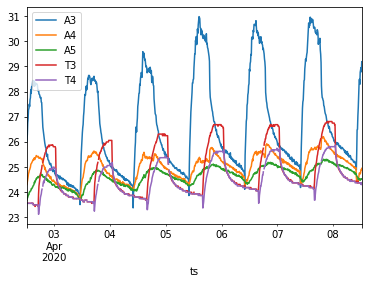

In [4]:
unidos.plot()

In [21]:
p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
#p.scatter(x=unidos.index,y=unidos.A3,color=colores[40],legend_label='A3')
p.scatter(x=unidos.index,y=unidos.A4,color=colores[40],legend_label='A4')
p.scatter(x=unidos.index,y=unidos.A5,color=colores[55],legend_label='A5')
p.scatter(x=unidos.index,y=unidos.A6,color=colores[35],legend_label='A6')

p.legend.location = "bottom_right"
show(p)

In [6]:
p = figure(title="A3 comparado con A4", x_axis_label='T3 [\xb0 C]', y_axis_label='T4 [\xb0 C]')
p.scatter(x=unidos.A4,y=unidos.A5,color=colores[18],legend_label='A3/A4')
p.legend.location = "bottom_right"
show(p)

In [7]:
p = figure(title="Temperaturas protipo", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=unidos.index,y=unidos.T3,color=colores[3],legend_label='T3')
p.scatter(x=unidos.index,y=unidos.T4,color=colores[4],legend_label='T4')
p.legend.location = "bottom_right"
show(p)

In [31]:

p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=unidos.index,y=unidos.T3,color=colores[3],legend_label='T3')
p.scatter(x=unidos.index,y=unidos.T4,color=colores[4],legend_label='T4')
p.scatter(x=unidos.index,y=unidos.A4,color=colores[40],legend_label='A4')
p.scatter(x=unidos.index,y=unidos.A5,color=colores[55],legend_label='A5')
p.scatter(x=unidos.index,y=unidos.A6,color=colores[35],legend_label='A6')

p.legend.location = "bottom_right"
show(p)

In [13]:
p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=unidos.index,y=unidos.A3,color=colores[40],legend_label='A4')
p.scatter(x=unidos.index,y=unidos.T3,color=colores[3],legend_label='T3')
p.legend.location = "bottom_right"
show(p)

In [41]:
p = figure(title="Temperaturas Adquisidor", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=unidos.index,y=unidos.A4,color=colores[40],legend_label='A4')
p.scatter(x=unidos.index,y=unidos.T4,color=colores[4],legend_label='T4')
p.legend.location = "bottom_right"
show(p)

In [ ]:
Errores de sensor 2:    
Errores de sensor 3:    
Errores de sensor 4:    
Errores de sensor 5:    
Errores de sensor 6:    
Errores de sensor 7:    
